## Name: 張宸愷
## ID: 0710018

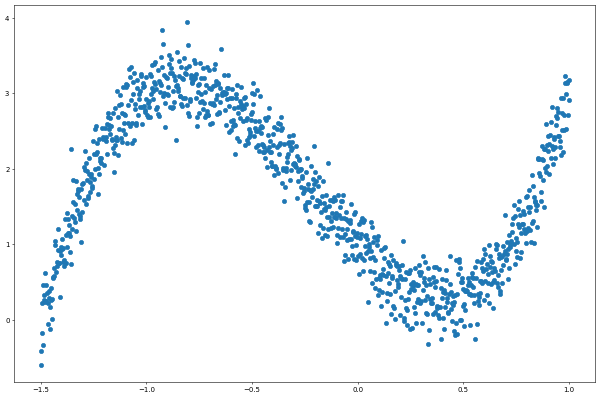

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# data generation
Xs = np.linspace(-1.5, 1.0, 1000)
noise = np.random.normal(0, 0.25, size=Xs.shape)
Ys = 3 * Xs**3 + 2 * Xs**2 - 3 * Xs + 1 + noise

f = plt.figure(figsize=(15, 10), dpi=50)
_ = plt.scatter(Xs, Ys)
